# 1 - Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# 2 - Reading the Data Set

In [37]:
# veri setini okumak

data_set = pd.read_csv("bank.csv")
print(data_set.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


# 3 - Exploratory Data Analysis

**Getting Information About the Data Set**

In [38]:
# veri setini tanıyalım

# veri seti hakkında bilgi almak
print(data_set.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


**Getting Information About the Data Set**

In [39]:
# veri seti hakkında bilgi almak
print(data_set.describe())
print("\n\n")


               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  





**Performing Repeated Data Analysis on a Dataset**

In [40]:
# veri setinde tekrarlayan veri analizi
print("Veri setinden satirlarda tekrar eden veri olan satir sayisi : ", data_set.duplicated().sum())
print("\n\n")


Veri setinden satirlarda tekrar eden veri olan satir sayisi :  0





**Analyzing Missing Data in a Data Set**

In [41]:
# eksik veri analizi
print("Veri setinde satirlarda eksik olan veri sayisi : ", data_set.isnull().sum())
print("\n\n")


Veri setinde satirlarda eksik olan veri sayisi :  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64





**Examining the 'Unique' Values in the Data Set**

In [42]:
print("BENZERSIZ DEGERLER")

for i in data_set.columns:
    print(f"Unique : {data_set[i].unique()}")
    print("\n\n")

#print(data_set.columns)


BENZERSIZ DEGERLER
Unique : [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]



Unique : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']



Unique : ['married' 'single' 'divorced']



Unique : ['primary' 'secondary' 'tertiary' 'unknown']



Unique : ['no' 'yes']



Unique : [ 1787  4789  1350 ...  -333 -3313  1137]



Unique : ['no' 'yes']



Unique : ['no' 'yes']



Unique : ['cellular' 'unknown' 'telephone']



Unique : [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]



Unique : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']



Unique : [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125 

**Deleting Columns that Do Not Match the Model in the Dataset and Examining the Distributions of the Data**

In [43]:
# modele uymayacak kolonlari silmek
data_set.drop(['job','education', 'default','day','month','loan'], axis=1, inplace = True)

    
for i in data_set.columns:
    print(i,"kolonunundaki degerlerin kac defa tekrarladiklari :\n",data_set[i].value_counts())


print("\n\n")

age kolonunundaki degerlerin kac defa tekrarladiklari :
 34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64
marital kolonunundaki degerlerin kac defa tekrarladiklari :
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64
balance kolonunundaki degerlerin kac defa tekrarladiklari :
 0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: balance, Length: 2353, dtype: int64
housing kolonunundaki degerlerin kac defa tekrarladiklari :
 yes    2559
no     1962
Name: housing, dtype: int64
contact kolonunundaki degerlerin kac defa tekrarladiklari :
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
duration kolonunundaki degerlerin kac defa tekrarladiklari :
 123     27
104     25
119     23
77      22
58      22
        ..
762      1
602      1
923      1
1032 

**Converting Categorical Data to Nominal Data**

In [44]:
marital_types = pd.get_dummies(data_set.marital, prefix='marital')
housing_types = pd.get_dummies(data_set.housing, prefix='housing')
contact_types = pd.get_dummies(data_set.contact, prefix='contact')
poutcome_types = pd.get_dummies(data_set.poutcome, prefix='poutcome')
y_types = pd.get_dummies(data_set.y, prefix='y')



data_set = pd.concat([data_set, marital_types, housing_types, contact_types, poutcome_types, y_types], axis=1)    

data_set.drop(['marital','housing', 'contact','poutcome','y'], axis=1, inplace = True)

print(data_set.describe())
print(data_set.columns)

               age       balance     duration     campaign        pdays  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819   263.961292     2.793630    39.766645   
std      10.576211   3009.638142   259.856633     3.109807   100.121124   
min      19.000000  -3313.000000     4.000000     1.000000    -1.000000   
25%      33.000000     69.000000   104.000000     1.000000    -1.000000   
50%      39.000000    444.000000   185.000000     2.000000    -1.000000   
75%      49.000000   1480.000000   329.000000     3.000000    -1.000000   
max      87.000000  71188.000000  3025.000000    50.000000   871.000000   

          previous  marital_divorced  marital_married  marital_single  \
count  4521.000000       4521.000000      4521.000000     4521.000000   
mean      0.542579          0.116788         0.618668        0.264543   
std       1.693562          0.321203         0.485767        0.441138   
min       0.000000          0.00

**Deleting Dummy Variables After Conversion**

In [46]:
# kukla degiskenler veri setinden silmek
data_set.drop(['housing_no','contact_cellular', 'poutcome_other','marital_divorced','y_no'], axis=1, inplace = True)

print(data_set.columns)


Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'housing_yes', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown', 'y_yes'],
      dtype='object')


**Correlation Analysis of the Data Set**

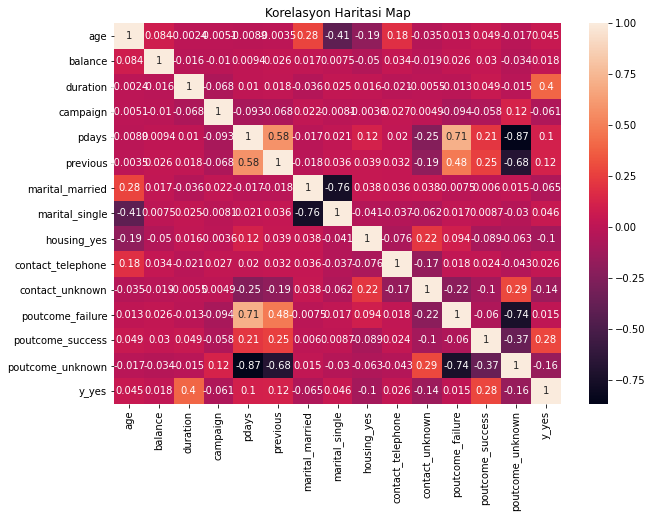

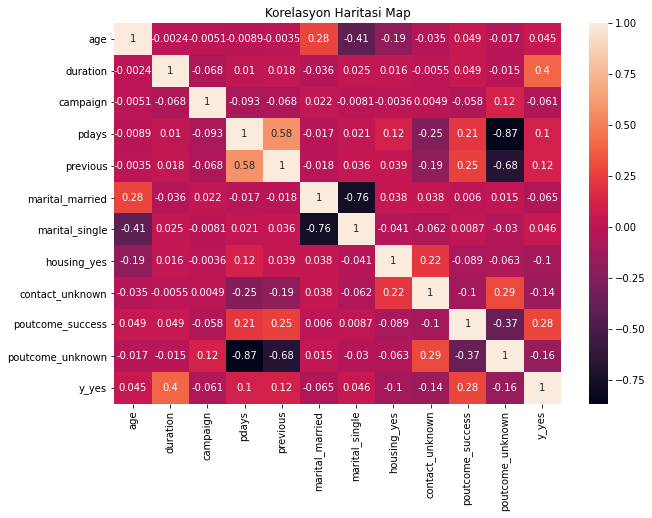

In [47]:
# korelasyon matrisi cizdirmek

corrmat= data_set.corr()
plt.figure(figsize=(10,7))
plt.title('Korelasyon Haritasi Map')
sns.heatmap(corrmat,annot=True)
plt.show()

# korelasyon analizi sonrasi veri setinden silme islemi
data_set.drop(['balance','poutcome_failure', 'contact_telephone'], axis=1, inplace = True)


corrmat= data_set.corr()
plt.figure(figsize=(10,7))
plt.title('Korelasyon Haritasi Map')
sns.heatmap(corrmat,annot=True)
plt.show()

# korelasyon haritasinda pozitif ya da negatif korelasyon durumu tespit edilmedi

**Separating the Data Set into Dependent and Independent Variables**

In [48]:
y = data_set["y_yes"]

data_set.drop(["y_yes"], axis=1, inplace=True)

x = data_set


**Separating the Data Set into Test and Training Data**

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=46)


**Performing a Normalization Operation on a Data Set**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


# 4 - Algorithms

**Logistic Regression Algorithm**

In [50]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train,y_train)

print('lojistik regresyon eğitim verisi doğruluk değeri: ',lr_model.score(x_train,y_train))
print('lojistik regresyon test verisi doğruluk değeri: ',lr_model.score(x_test,y_test))


lojistik regresyon eğitim verisi doğruluk değeri:  0.900126422250316
lojistik regresyon test verisi doğruluk değeri:  0.9034635224760501


**The KNN Algorithm**

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

print('knn eğitim verisi doğruluk değeri: ',knn_model.score(x_train,y_train))
print('knn test verisi doğruluk değeri: ',knn_model.score(x_test,y_test))


knn eğitim verisi doğruluk değeri:  0.9235145385587863
knn test verisi doğruluk değeri:  0.8820928518791452


**The Decision Tree Algorithm**

In [52]:
tree_model = DecisionTreeClassifier(max_depth=2) # ağaca 2 verince test ve eğitim aynı başarı çıkıyor.
tree_model.fit(x_train,y_train)

print('tree eğitim verisi doğruluk değeri: ',tree_model.score(x_train,y_train))
print('tree test verisi doğruluk değeri: ',tree_model.score(x_test,y_test))

tree eğitim verisi doğruluk değeri:  0.8985461441213654
tree test verisi doğruluk değeri:  0.9064112011790715


# 5 - Model Evaluation Stage

**Kullanılan Metrikler**

**a) Accuracy Value**

**b) Sensitivity Value**

**c) Specifity Value**

**d) f1-score Value**

**e) precision Value**

**f) recall Value**

**g) support Value**

In [54]:
predict_lr_model = lr_model.predict(x_test)
predict_knn_model = knn_model.predict(x_test)
predict_tree_model = tree_model.predict(x_test)
predict_models = [predict_lr_model, predict_knn_model, predict_tree_model]

cf_matris_lr_model = confusion_matrix(y_test, predict_lr_model)
cf_matris_knn_model = confusion_matrix(y_test, predict_knn_model)
cf_matris_tree_model = confusion_matrix(y_test, predict_tree_model)
cf_matrisler = [cf_matris_lr_model, cf_matris_knn_model, cf_matris_tree_model]


algorithms = ["lojistik regresyon", "knn algoritmasi","karar agaci algoritmasi"]

for i,c in zip(algorithms, predict_models):
    print(i,"algoritmasi icin;\n")
    print(classification_report(y_test,c))
    print("_________________________________________________________")

for i,c in zip(cf_matrisler, algorithms):
    TP = i[1, 1]  # true positive
    TN = i[0, 0]  # true negatives
    FP = i[0, 1]  # false positives
    FN = i[1, 0]  # false negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = (TP) / (TP + FN)
    specifity = (TN) / (TN + FP)

    print('')
    print('')
    print(c,'accuracy değeri: ',accuracy)
    print(c,'sensitivity değeri',sensitivity)
    print(c,'specifity değeri',specifity)
    print('')
    print('')


lojistik regresyon algoritmasi icin;

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1207
           1       0.64      0.29      0.40       150

    accuracy                           0.90      1357
   macro avg       0.78      0.63      0.67      1357
weighted avg       0.89      0.90      0.89      1357

_________________________________________________________
knn algoritmasi algoritmasi icin;

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1207
           1       0.46      0.34      0.39       150

    accuracy                           0.88      1357
   macro avg       0.69      0.64      0.66      1357
weighted avg       0.87      0.88      0.87      1357

_________________________________________________________
karar agaci algoritmasi algoritmasi icin;

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1207
     

# Explanation - Turkish

In [2]:
# modeller değerlendirildiğinde
# burada algoritmaların üçününde iyi sonuçlar verdiğini söyleyebiliriz.
# bu sonuçlar kabul edilebilir düzeydedir.
# ancak veri ön işleme aşamasında daha iyi bir çalışma yapıldığı koşulda 
# bu değerlerin artabileceğini söyleyebiliriz.

# burada bu modellerin bu kadar yüksek accuracy değerleri üretmesindeki 
# en önemli kısım veri ön işleme aşamasında gösterdiğimiz işçiliktir.

# modeller arasında kıyaslama
# bu veri seti için;
# karar ağcı algoritması ve lojistik regresyon algoritması hemen hemen aynı başarı oranını yakalamıştır.
# knn algoritması bu iki algoritmaya kıyasla daha pasif kalsada onun değeride yüksek bir değerdir.

# Sonuç olarak bu veri seti için farklı algoritmalarında denenmesi daha iyi olacaktır.
# 3 algoritmanında iyi sonuçlar verdiğini düşünüyorum.
